In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("train.csv")


In [5]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[1000:m].T
y_train = data_train[0]
X_train = data_train[1:n]

In [9]:

X_train[:,0].shape

(784,)

In [ ]:
def init_param():
    w1 = np.random.rand(10,784)-0.5
    b1 = np.random.rand(10,1)-0.5
    w2 = np.random.rand(10, 10)-0.5
    b2 = np.random.rand(10,1)-0.5
    return w1, b1, w2, b2

In [41]:
def relu(z):
    return np.maximum(0, z)

In [90]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z), axis=0)

In [65]:
def forward_prop(w1, b1, w2, b2, X):
    z1 =w1.dot(X) + b1
    a1 = relu(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

In [66]:
def one_hot(y):
    one_hot_y = np.zeros([y.size, y.max() + 1])
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T 
    return one_hot_y

In [67]:
def deriv_relu(z):
    return z >0

In [68]:
def backward_prop(z1, a1, z2, a2, w2,  X,  y):
    one_hot_y = one_hot(y)

    dz2 = a2 - one_hot(y)
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1/m* np.sum(dz2, 1).reshape(-1,1)
    dz1 = w2.T.dot(dz2) * deriv_relu(z1)
    dw1 = 1/m * dz2.dot(X.T)
    db1 = 1/m * np.sum(dz1, 1).reshape(-1,1)
    return dw1, db1, dw2, db2

In [69]:
def update_param(w1, b1, w2, b2, dw1, db1, dw2, db2, L ):
    w1 = w1 - L*dw1
    b1 = b1 - L *db1
    w2 = w2-L* dw2
    b2 = b2 -L * db2
    return w1, b1, w2, b2

In [70]:
def predictions(a2):
    return np.argmax(a2, axis=0)

In [71]:
def accuracy(predictions, y):
    print(predictions, y)
    return np.sum(predictions==y)/y.size

In [72]:
def gradient_descent(X, y , iter, L):
    w1, b1, w2, b2 = init_param()

    for i in range(iter):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, X)
        dw1, db1, dw2, db2 = backward_prop(z1, a1, z2, a2,w2,  X, y)
        w1, b1, w2, b2 = update_param(w1, b1, w2, b2, dw1, db1, dw2, db2, L)
        if(i%10 ==0):
            print(f"Iterations: {i}")
            print(f"Accuracy: {accuracy(predictions(a2), y)}")
    return w1, b1, w2, b2

In [73]:
w1, b1, w2, b2= gradient_descent(X_train, y_train, 100, 0.1)

Iterations: 0
[1 1 7 ... 1 6 1] [3 7 3 ... 2 8 6]
Accuracy: 0.12478048780487805
Iterations: 10
[9 9 9 ... 7 7 7] [3 7 3 ... 2 8 6]
Accuracy: 0.0861951219512195
Iterations: 20
[0 9 9 ... 4 1 4] [3 7 3 ... 2 8 6]
Accuracy: 0.33134146341463416
Iterations: 30
[5 7 3 ... 2 1 6] [3 7 3 ... 2 8 6]
Accuracy: 0.6158780487804878
Iterations: 40
[5 7 5 ... 2 1 6] [3 7 3 ... 2 8 6]
Accuracy: 0.7090731707317073
Iterations: 50
[5 7 5 ... 2 1 6] [3 7 3 ... 2 8 6]
Accuracy: 0.7819024390243903
Iterations: 60
[5 7 5 ... 2 8 6] [3 7 3 ... 2 8 6]
Accuracy: 0.7754390243902439
Iterations: 70
[5 7 5 ... 2 1 6] [3 7 3 ... 2 8 6]
Accuracy: 0.797219512195122
Iterations: 80
[5 7 5 ... 2 1 6] [3 7 3 ... 2 8 6]
Accuracy: 0.8598780487804878
Iterations: 90
[5 7 5 ... 2 2 6] [3 7 3 ... 2 8 6]
Accuracy: 0.7465609756097561


In [ ]:
def make_pred( X, w1, b1, w2, b2):
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, X)
    prediction = predictions(a2)
    return prediction

def test_predictions(index, w1, b1, w2, b2):
    current_img = X_train[:, index, None]
    prediction = make_pred(X_train[:, index, None], w1, b1, w2, b2)
    label = y_train[index]
    print(f"Prediction: {prediction}")
    print(f"Label: {label}")

    current_img = current_img.reshape((28, 28)) *255
    plt.gray()
    plt.imshow(current_img, interpolation='nearest')
    plt.show()

Prediction: [5]
Label: 5


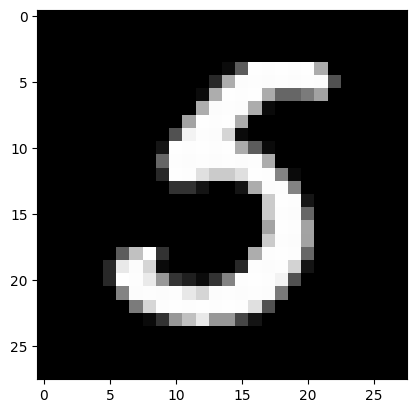

In [89]:
test_predictions( 44, w1, b1, w2, b2)